In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv(r"..\data\dehliclimate.csv")
##plt.style.use("dark_background")

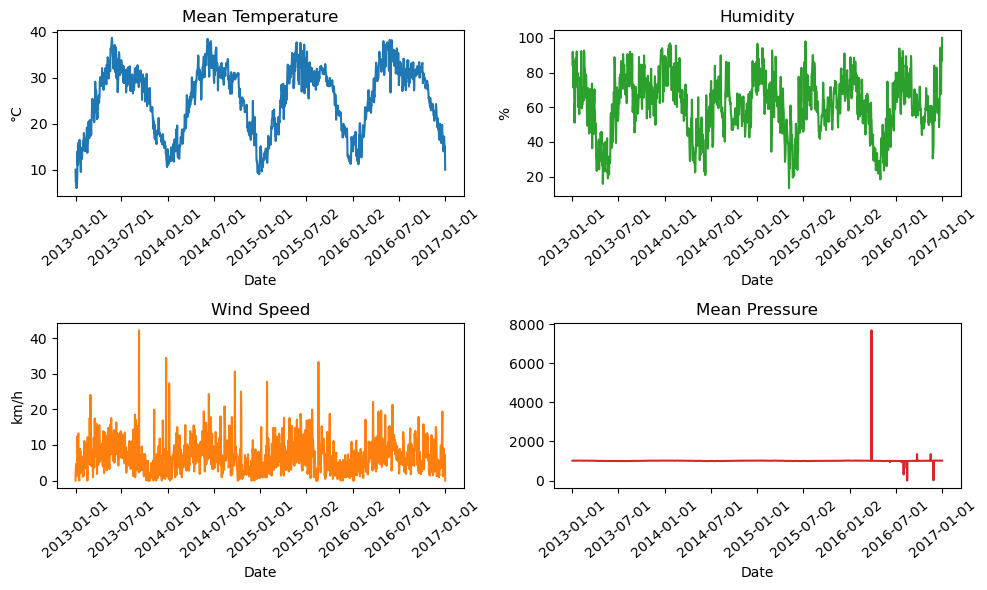

In [3]:
fig , ax = plt.subplots(2,2, figsize=(10, 6))
ax[0, 0].plot(df['date'], df['meantemp'], color='tab:blue')
ax[0, 0].set_title('Mean Temperature')
ax[0, 0].set_ylabel('°C')

ax[0, 1].plot(df['date'], df['humidity'], color='tab:green')
ax[0, 1].set_title('Humidity')
ax[0, 1].set_ylabel('%')

ax[1, 0].plot(df['date'], df['wind_speed'], color='tab:orange')
ax[1, 0].set_title('Wind Speed')
ax[1, 0].set_ylabel('km/h')

ax[1, 1].plot(df['date'], df['meanpressure'], color='tab:red')
ax[1, 1].set_title('Mean Pressure')

locticks = mdates.AutoDateLocator(minticks=5, maxticks=10)

for axe in ax.flat:
    axe.set_xlabel('Date')
    axe.xaxis.set_major_locator(locticks)
    axe.tick_params(axis='x', rotation=40)

plt.tight_layout()
plt.show()

### Ordinary Least Squares (OLS) [Intercept and coefficients]
$$
\beta = (X^T X)^{-1} X^T y
$$

### Mutiple linear regression (Matrix Dot): 
$\beta$ = Coefficient of Xi 
<br>${x}$ = Matrix of x
$$\hat{y} = X\beta$$

#### Mean Squared Error
MSE is the average of the squared differences between actual and preds values.

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In [47]:
def MSE(y , y_pred) -> float:

    if len(y) == len(y_pred):
        err_summation = 0
        for idx in range(len(y)):
            err_summation += np.power(y[idx] - y_pred[idx],2)
        mse = (1 / len(y)) * err_summation
        return mse
        
    else: 
        print(f"Y has lenght {len(y)} x Y_Pred has lengh {len(y_pred)}")
        exit



def RMSE(y , y_pred) -> float:

    if len(y) == len(y_pred):
        err_summation = 0
        for idx in range(len(y)):
            err_summation += np.power(y[idx] - y_pred[idx],2)
        mse = (1 / len(y)) * err_summation
        return np.sqrt(mse)
        
    else: 
        print(f"Y has lenght {len(y)} x Y_Pred has lengh {len(y_pred)}")
        exit

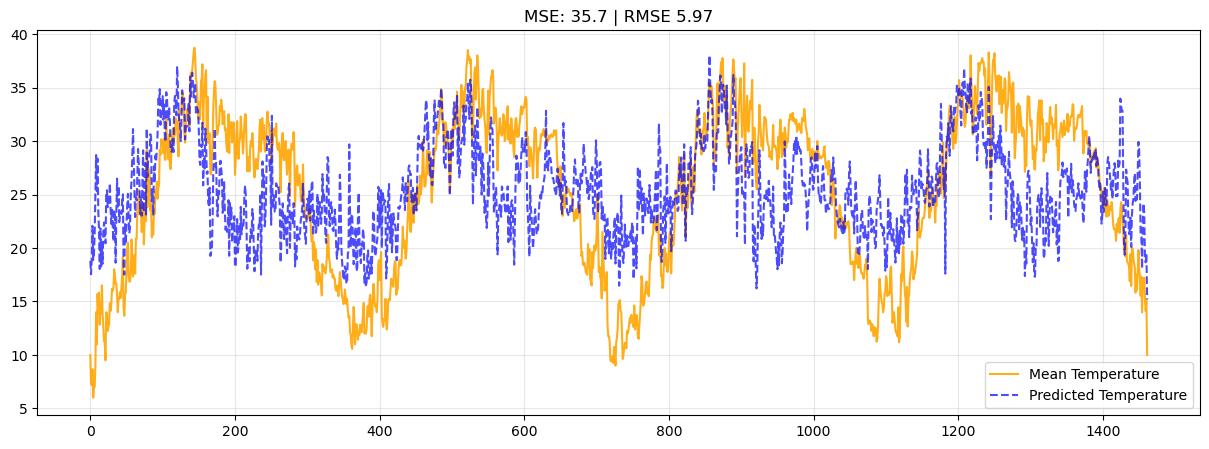

In [49]:
x_data = df[['meanpressure','wind_speed','humidity']]
y_data = df['meantemp']

x_stack = np.column_stack([np.ones(len(x_data)), x_data])
x_stack_t = x_stack.T

ols = np.linalg.inv(x_stack_t.dot(x_stack)).dot(x_stack_t).dot(y_data)

intercept = ols[0]
coefficients = ols[1:]
    
y_pred = intercept + x_data.dot(coefficients)

mse: float = np.round(MSE(y_data,y_pred), 2)
rmse: float = np.round(RMSE(y_data,y_pred),2)

ax = plt.figure(figsize=(15,5))
plt.plot(y_data, color='orange', label="Mean Temperature", alpha=0.9)
plt.plot(y_pred ,linestyle='--', color = "blue",alpha= 0.7, label ="Predicted Temperature")
plt.title(f"MSE: {mse} | RMSE {rmse}")
plt.legend()
plt.grid(True, alpha=0.3)